<div style="width: 90%; margin: auto; padding: 10px; background-color: #2C3E50; ;text-align: center;" markdown="1">
    <h2 style="color:#F39C12; font-size: 20px"><strong>AIRBNB DUBLIN:</strong></h2>
</div>

<div style="width: 90%; margin: auto; background-color: #2C3E50; text-align: left;" markdown="1">
<ol style="color:#ABB2B9; font-weight: bold; margin: 20px;">
    <li>Importing Libraries</li>
    <li>Loading the dataset</li>
    <li>Data Cleaning:
        <ul>
            <li>Deleting redundant columns.</li>
            <li>Dropping duplicates.</li>
            <li>Cleaning individual columns.</li>
            <li>Remove the NaN values from the dataset.</li>
        </ul>
    </li>
    <li>PART 01</li>
    <li>Data Visualization:
        <ul>
            <li>Using plots to find relations between the features.</li>
            <li>Get Correlation between different variables.</li>
            <li>Plot all Neighbourhood Group.</li>
            <li>Neighbourhood.</li>
            <li>Room Type.</li>
            <li>Relation between neighbourgroup and Availability of Room.</li>
            <li>Map of Neighbourhood group.</li>
            <li>Map of Neighbourhood.</li>
            <li>Availability of room.</li>
            <li>Word Cloud.</li>
        </ul>
    </li>
    <li>Regression Analysis
        <ul>
            <li>Linear Regression</li>
            <li>Decision Tree Regression</li>
            <li>Random Forest Regression</li>
        </ul>
    </li>
</ol>
</div>

In [314]:
!pip install missingno

In [315]:
!pip install folium

<div style="width: 90%; margin: auto; background-color: #2C3E50; padding: 20px; text-align: center; font-style: italic;" markdown="1">
    <span style="font-size: 20px; font-weight: bold; color:#F39C12; ">DATA LOADING</span>
</div>

In [393]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import warnings
import folium
import pandas as pd
warnings.filterwarnings('ignore')

In [394]:
airbnb = pd.read_csv("airbnb.csv")
airbnb.shape

(7566, 75)

In [318]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [411]:
# Shadow of dataset
abn_df = airbnb.copy()
print("Original DataFrame:")
abn_df.sample(5)

Original DataFrame:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5536,49071541,https://www.airbnb.com/rooms/49071541,2.022090e+13,12/09/22,previous scrape,"Bright, spacious family home in Blackrock, Dublin",Our house is a bright & spacious 4 bed family ...,Blackrock is a coastal suburb 8km south of Dub...,https://a0.muscache.com/pictures/02258a7f-7be8...,134535636,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.07
1212,13061094,https://www.airbnb.com/rooms/13061094,2.022090e+13,12/09/22,city scrape,Alensgrove Cottages No. 02,"Note ""There are 9 more Cottages Listed at this...",Alensgrove can be found within an enclosed cou...,https://a0.muscache.com/pictures/df13d157-25ce...,69800478,...,4.95,4.88,4.90,NaN,t,15,13,0,0,2.15
1216,13071668,https://www.airbnb.com/rooms/13071668,2.022090e+13,12/09/22,previous scrape,Male shared bedroom | Central location | Students,Great Atmosphere in a bright accommodation in ...,NaN,https://a0.muscache.com/pictures/a21a7ed6-270e...,47704400,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
5026,40339588,https://www.airbnb.com/rooms/40339588,2.022090e+13,12/09/22,previous scrape,"Cozy, spacious and great located flat","Cozy, spacious and full of light 2 rooms flat....",Easy access to transportation 1 minute from Bu...,https://a0.muscache.com/pictures/d0433599-0786...,277709526,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
4499,34931054,https://www.airbnb.com/rooms/34931054,2.022090e+13,12/09/22,city scrape,Drury Court Hotel- super central Dublin hotel,<b>The space</b><br />Our triple rooms offer a...,The Drury Court is in the perfect location for...,https://a0.muscache.com/pictures/1bf36afc-0a6a...,256945665,...,4.94,4.95,4.74,NaN,t,8,0,8,0,2.33


In [412]:
# A Little Information about DataSet
abn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   float64
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

<div style="width: 90%; margin: auto; background-color: #2C3E50; padding: 20px; text-align: center; font-style: italic;" markdown="1">
    <span style="font-size: 20px; font-weight: bold; color:#F39C12; ">DATA CLEANING</span>
</div>

In [395]:
# Checking Duplicate Value
abn_df.duplicated().sum()

0

<Axes: >

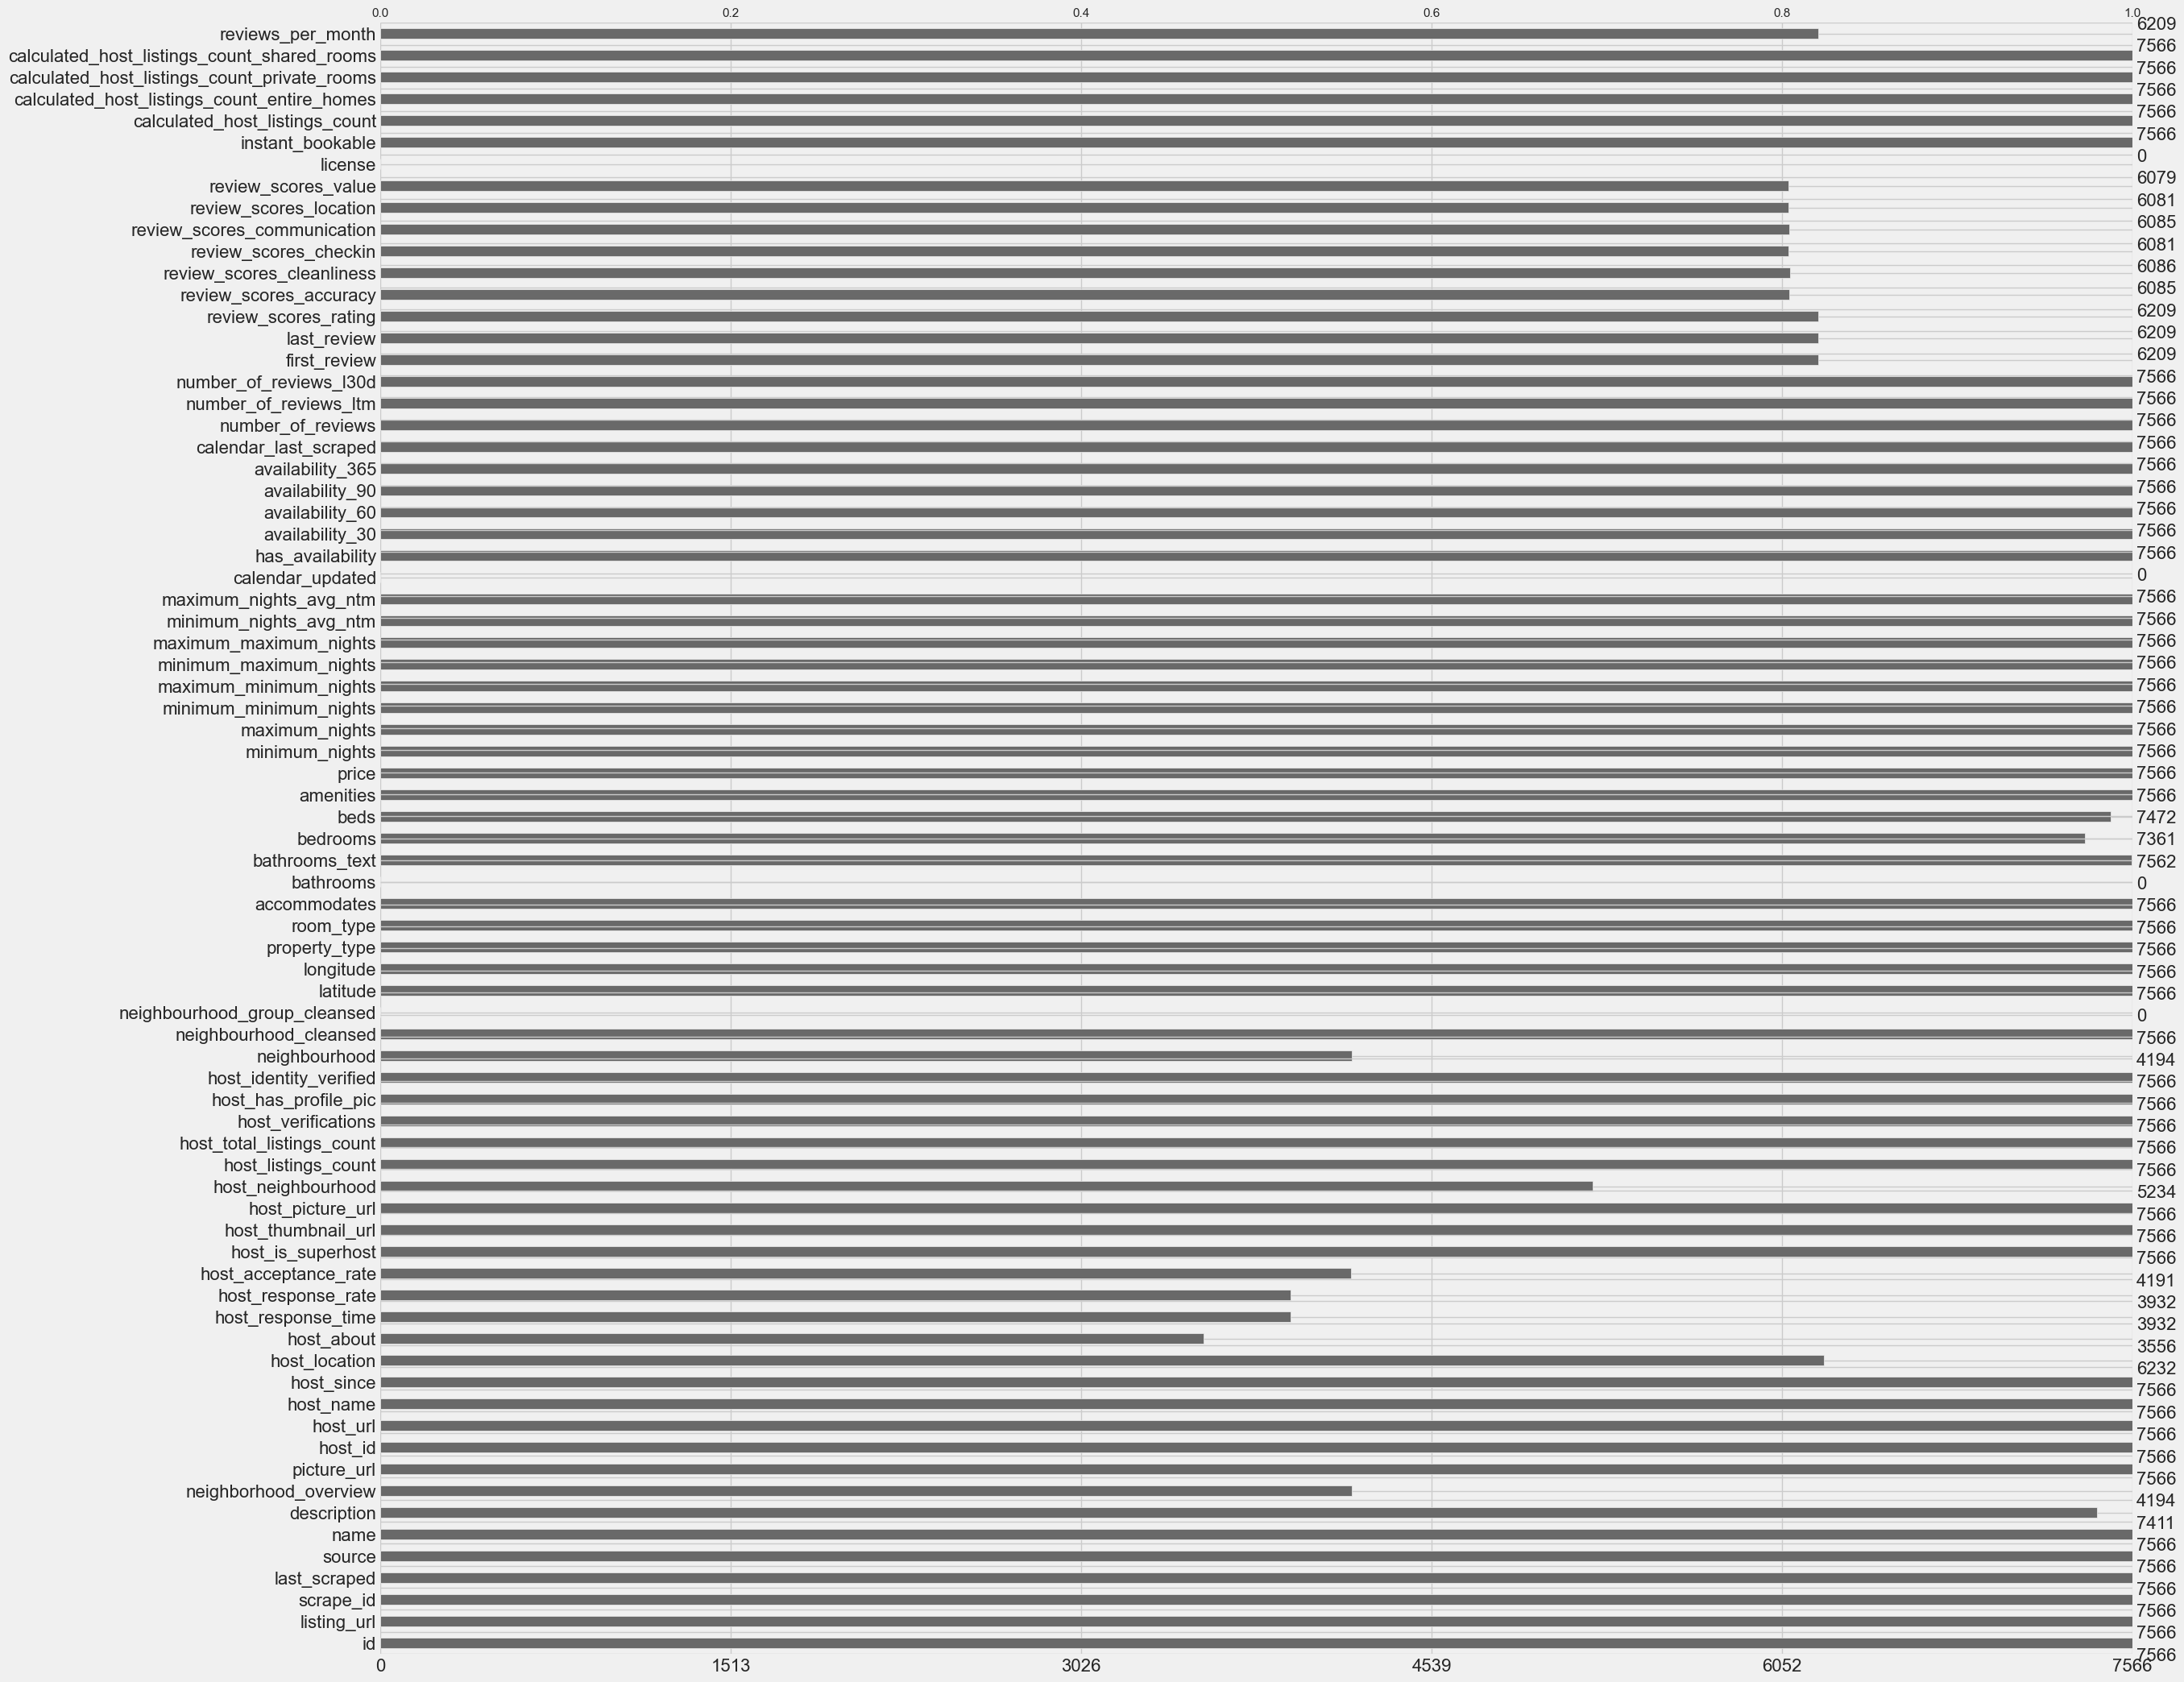

In [396]:
msno.bar(abn_df)

<div style="width: 90%; margin: auto; background-color: #2C3E50; padding: 10px; text-align: center; font-style: italic;" markdown="1">
    <span style="font-size: 15px; font-weight: bold; color:#F39C12; ">Selection of columns to analyze</span>
</div>

In [426]:
# Columns to use to analyze
columns_to_drop = ['id','listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_location', 'host_about',
       'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'bathrooms', 'amenities', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'review_scores_accuracy', 'review_scores_checkin', 'license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

clean_abn = abn_df.drop(columns=columns_to_drop)
use_abn = clean_abn.rename(columns={'Unnamed: 0': 'id'})
print("\nCleaned DataFrame:")
use_abn.sample(5)



Cleaned DataFrame:


,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms_text,...,has_availability,availability_365,number_of_reviews,last_review,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4568,30/01/18,within a few hours,100%,f,"Booterstown, County Dublin, Ireland",53.309630,-6.20849,Entire home/apt,6,2.5 baths,...,t,0,9,04/07/22,4.88,4.25,4.88,5.00,4.50,t
2677,06/02/11,NaN,NaN,f,"Dublin, County Dublin, Ireland",53.348940,-6.23789,Private room,2,1 private bath,...,t,0,3,07/10/18,5.00,5.00,5.00,5.00,4.33,f
3600,08/05/18,within an hour,90%,f,"Malahide, County Dublin, Ireland",53.451090,-6.15552,Entire home/apt,4,1.5 baths,...,t,1,133,26/08/22,4.79,4.77,4.86,4.98,4.62,t
6142,03/07/12,within a few hours,100%,f,"County Dublin, Ireland",53.568810,-6.11036,Entire home/apt,4,2.5 baths,...,t,0,1,04/07/22,5.00,5.00,5.00,5.00,5.00,f
6240,01/04/17,within a day,100%,f,NaN,53.350807,-6.27581,Private room,2,1 shared bath,...,t,132,7,11/09/22,4.86,5.00,5.00,4.86,4.57,f


# Columns Description
1. **id** - Acts as a unique key for each listing in the Airbnb data
2. **neighbourhood** - Contains the name of the area the listing is located at
3. **latitude** - Contains the latitude of the location
4. **longitude** - Contains the longitude of the location
5. **room_type** - Contains the space type of each listing
6. **price** - Contains the price per night in dollars listed by the host
7. **minimum_nights** - Contains the minimum number of nights the user is required to book
8. **review_scores_rating** - Contains the rating of reviews given to each listings
9. **availability_365** - Contains the number of days when listing is available for booking


<div style="width: 90%; margin: auto; background-color: #2C3E50; padding: 10px; text-align: center; font-style: italic;" markdown="1">
    <span style="font-size: 15px; font-weight: bold; color:#F39C12; ">Cleaning columns</span>
</div>

In [493]:
use_abn.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [442]:
#Price Column, change for float value
use_abn['price'] = use_abn['price'].replace('[\$,]', '', regex=True).astype(float).round(2)

In [422]:
#hots responde rate, chage for float value
use_abn['host_response_rate'] = use_abn['host_response_rate'].astype(str).str.rstrip('%').astype('float') / 100

In [424]:
#Normalization Room type
use_abn['room_type'] = use_abn['room_type'].str.lower().str.strip()

print(use_abn['room_type'].unique())

['private room' 'entire home/apt' 'shared room' 'hotel room']


In [432]:
# Replace NaN values with the mode
use_abn[['host_response_rate', 'bedrooms','review_scores_rating']] = use_abn[['host_response_rate', 'bedrooms','review_scores_rating']].fillna(mode_value)


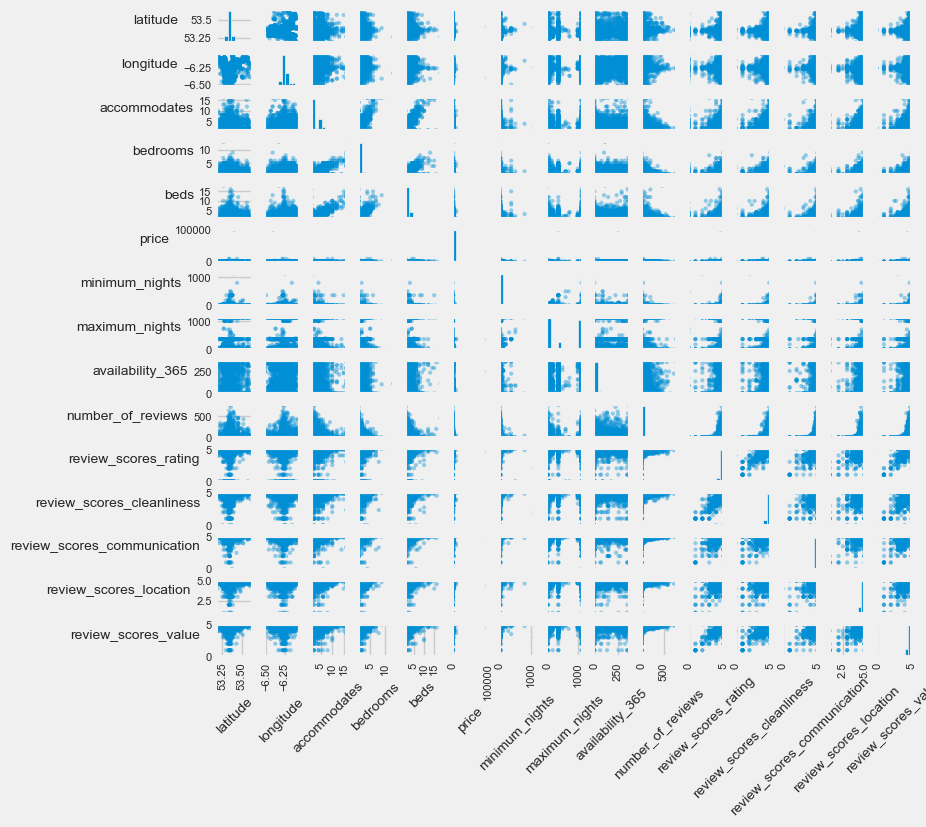

In [440]:
scatter_matrix = pd.plotting.scatter_matrix(use_abn, alpha=0.4, figsize=(8, 8), diagonal='hist')

# Rotar los nombres de los ejes
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_fontsize(10) 
    ax.yaxis.label.set_fontsize(10)

# Space btw plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [443]:
use_abn.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value
count,7566.000000,7566.000000,7566.000000,7566.000000,7472.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,6086.000000,6085.000000,6081.000000,6079.000000
mean,53.345530,-6.254830,3.006080,1.509781,1.832575,182.327953,6.253899,528.207507,64.799630,32.141554,4.674400,4.645670,4.843747,4.732065,4.614547
std,0.049009,0.063257,1.888488,0.910450,1.354338,1170.750214,28.165241,517.363963,105.541663,65.581141,0.715222,0.529977,0.341995,0.352586,0.441799
min,53.181730,-6.526020,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,53.329160,-6.278058,2.000000,1.000000,1.000000,65.000000,1.000000,15.000000,0.000000,1.000000,4.640000,4.520000,4.820000,4.630000,4.500000
50%,53.344210,-6.259630,2.000000,1.000000,1.000000,105.000000,2.000000,365.000000,0.000000,7.000000,4.890000,4.820000,4.970000,4.820000,4.710000
75%,53.357332,-6.233332,4.000000,2.000000,2.000000,192.750000,4.000000,1125.000000,91.000000,30.000000,5.000000,5.000000,5.000000,5.000000,4.890000
max,53.635000,-6.052910,16.000000,13.000000,18.000000,99149.000000,1125.000000,1125.000000,365.000000,770.000000,5.000000,5.000000,5.000000,5.000000,5.000000


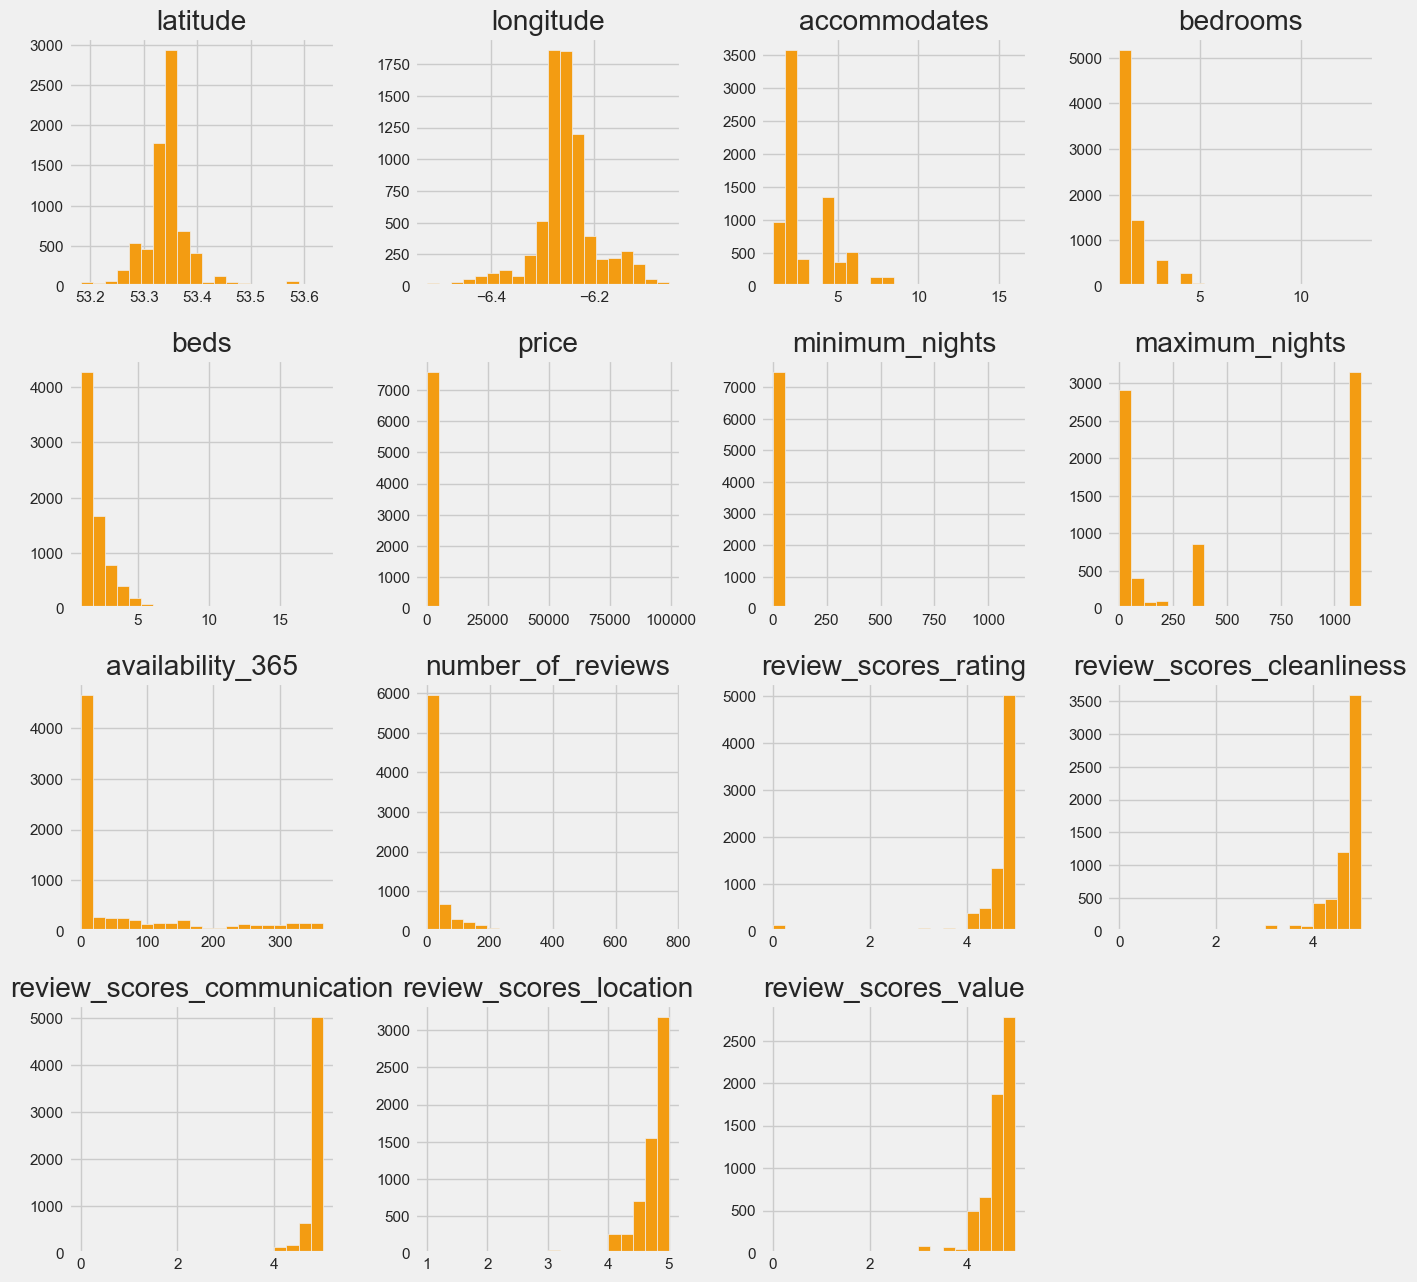

In [441]:
use_abn.hist(figsize=(15, 15), bins = 20, color='#F39C12')

plt.show()

<Axes: >

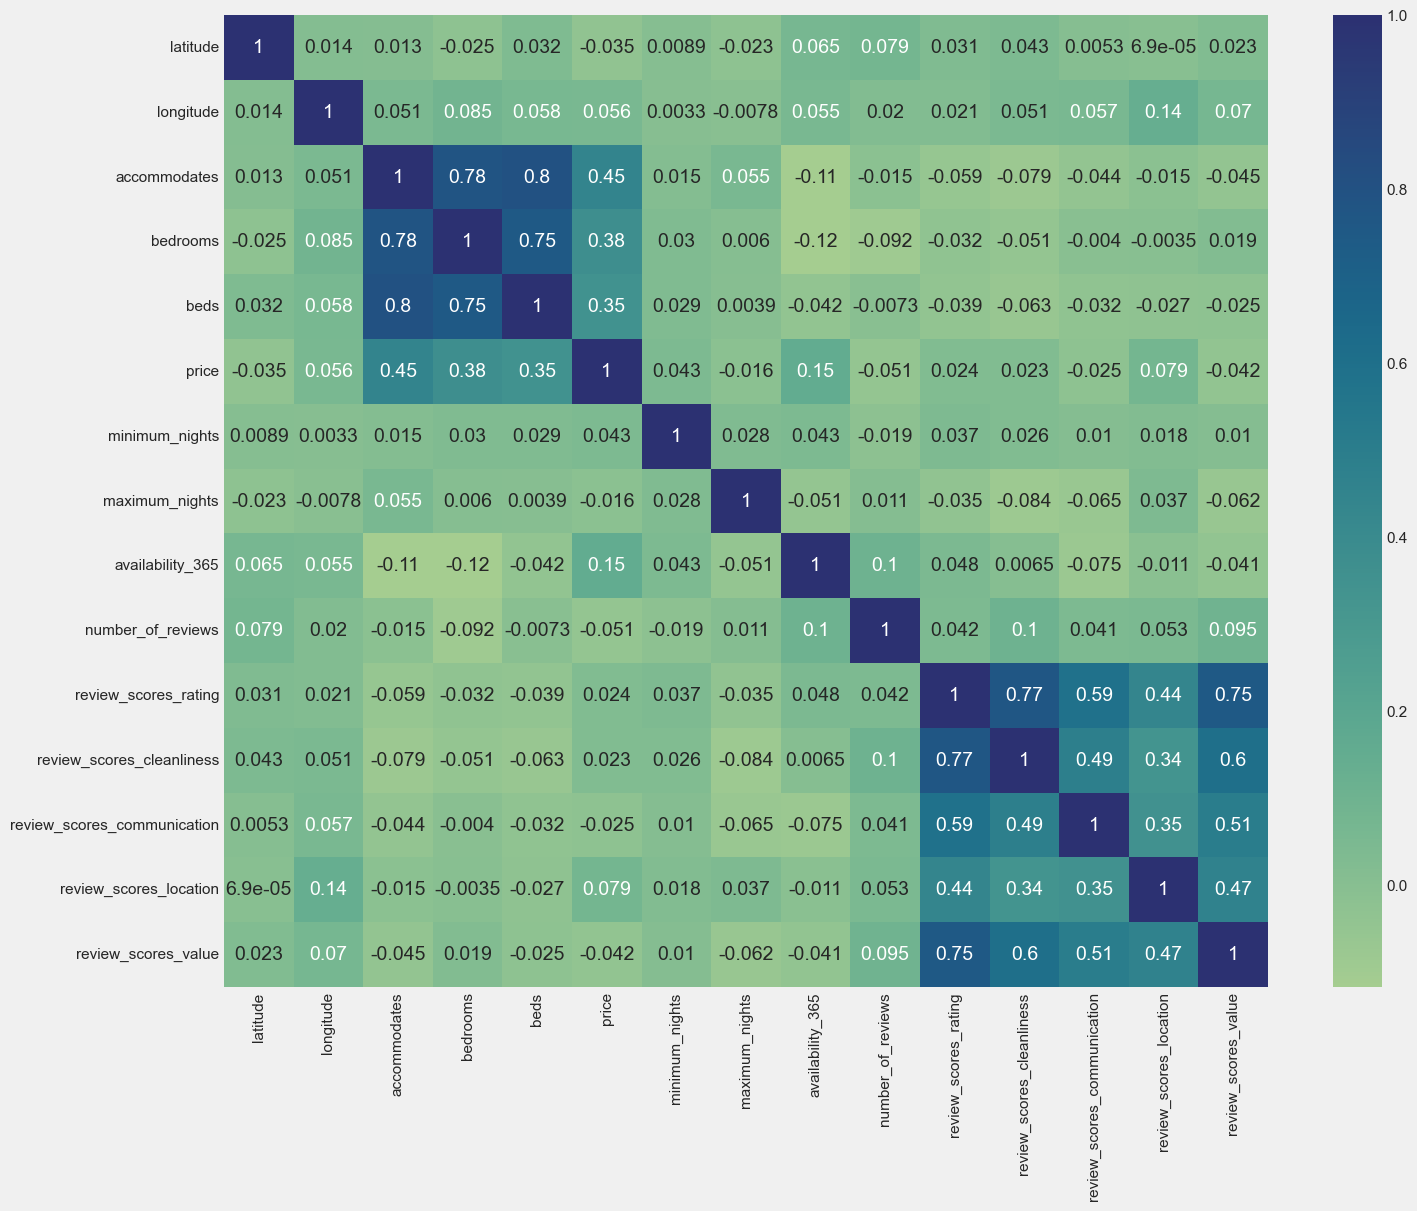

In [464]:
#DataFrame with only numerical features
numerical_data = use_abn.select_dtypes(include=['int64', 'float64'])
corr = numerical_data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap='crest')

**We can notice that :**

* Latitude and longitude columns follow a normal distribution, which means most of the hosts might have lisitngs concetrated in specific area.
* Most of the places there have 2 bedrooms, almost 75% of them.
* The scores in location, value, comunication and cleanlines is between 4 and 5 points.

<div style="width: 90%; margin: auto; background-color: #2C3E50; padding: 20px; text-align: center; font-style: italic;" markdown="1">
    <span style="font-size: 20px; font-weight: bold; color:#F39C12; ">DATA VISUALIZATION</span>
</div>

# Super Host

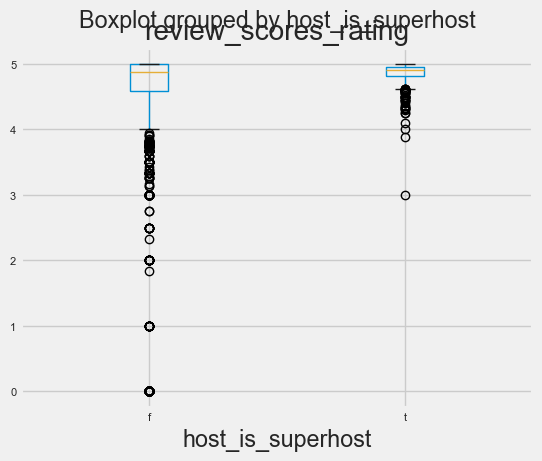

In [448]:
use_abn.boxplot(column='review_scores_rating', by='host_is_superhost', fontsize=8)

plt.show()

* The posibility to have a good experience with a super host its 75% more secure that with a usual host,
even though the score mean with a normal host is between 3 and 4.*

<div style="width: 90%; margin: auto; background-color:#F39C12; padding: 10px; text-align: center; font-style: italic;" markdown="1">
    
</div>

# Price and capacity

In [475]:
values_price = use_abn['price'].describe()
print("Values Price:", values_price)

Values Price: count    4714.000000
mean      119.406510
std        46.546567
min        57.000000
25%        80.000000
50%       107.000000
75%       150.000000
max       229.000000
Name: price, dtype: float64


In [458]:
use_abn = use_abn[(use_abn['price'] > use_abn['price'].quantile(0.1)) & (use_abn['price'] < use_abn['price'].quantile(0.9))]

<Axes: xlabel='price'>

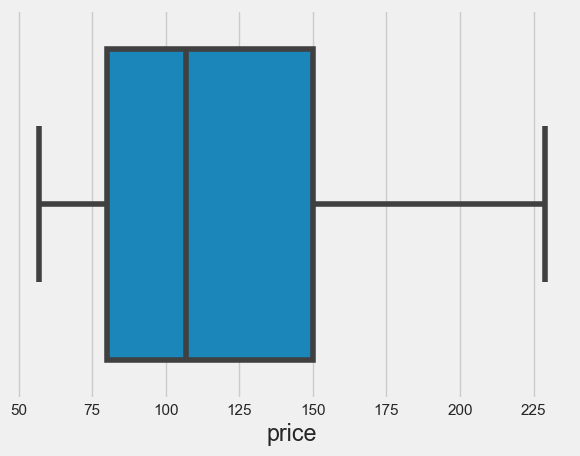

In [460]:
sns.boxplot(x=use_abn['price'])

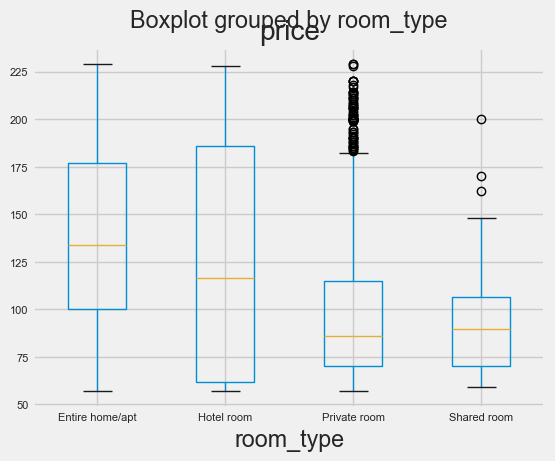

In [461]:
use_abn.boxplot(column='price', by='room_type', fontsize=8)

plt.show()

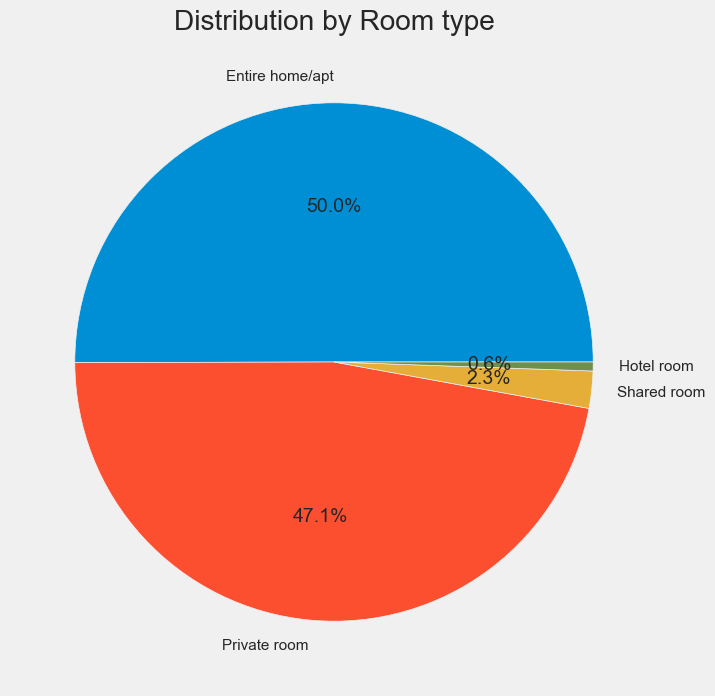

In [450]:
plt.figure(figsize=(8, 8))

use_abn['room_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution by Room type')
plt.ylabel('')  # delete label "y"

plt.show()

* The maximum price for a single room is 229 euros.
* The average cost is 119 euros.
* Interestingly, the mean cost for a Shared Room is higher than that for a Private Room.
* There is a possibility of finding an entire home/apartment for the same price as a Private Room.
* Hotels and shared rooms make up less than 3% of the Airbnb offerings. Therefore, it might be better to consider another platform if the user is looking for a hotel room, as the options here tend to be more expensive compared to other room types.

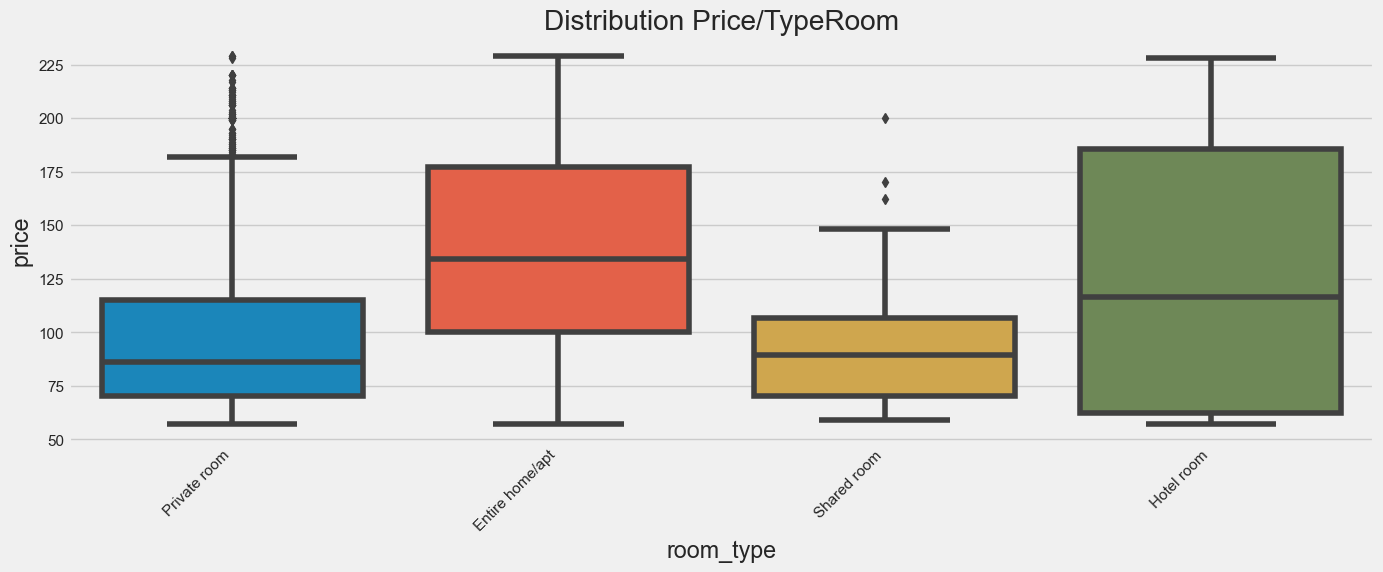

In [480]:
plt.figure(figsize=(15, 5))

sns.boxplot(x="room_type", y="price", data=use_abn)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mayor legibilidad

plt.title('Distribution Price/TypeRoom')
plt.show()

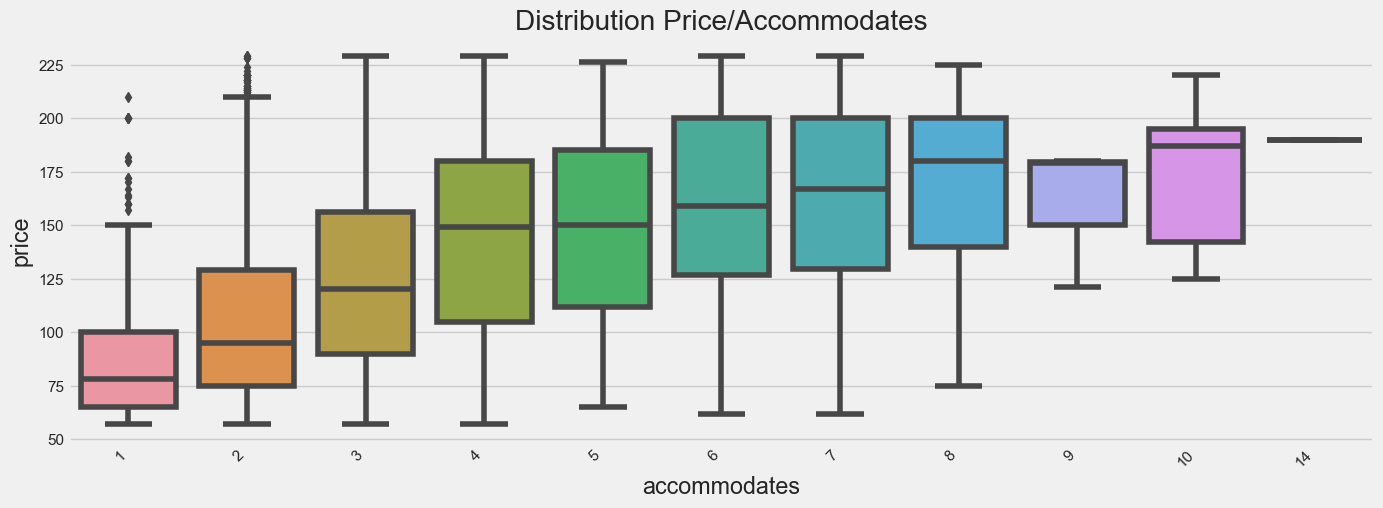

In [479]:
plt.figure(figsize=(15, 5))

sns.boxplot(x="accommodates", y="price", data=use_abn)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mayor legibilidad

plt.title('Distribution Price/Accommodates')
plt.show()

* The pricing for 1 to 5 people appears to be proportionate when compared to the cost per person.
* Between 5 and 8, the prices are similar, and the maximum price remains unchanged.
* Interestingly, the cost per person for 9 individuals is almost 100 euros less than for groups of 8 or even 5 people.
* Beyond 10 people, the maximum price appears to be consistent.

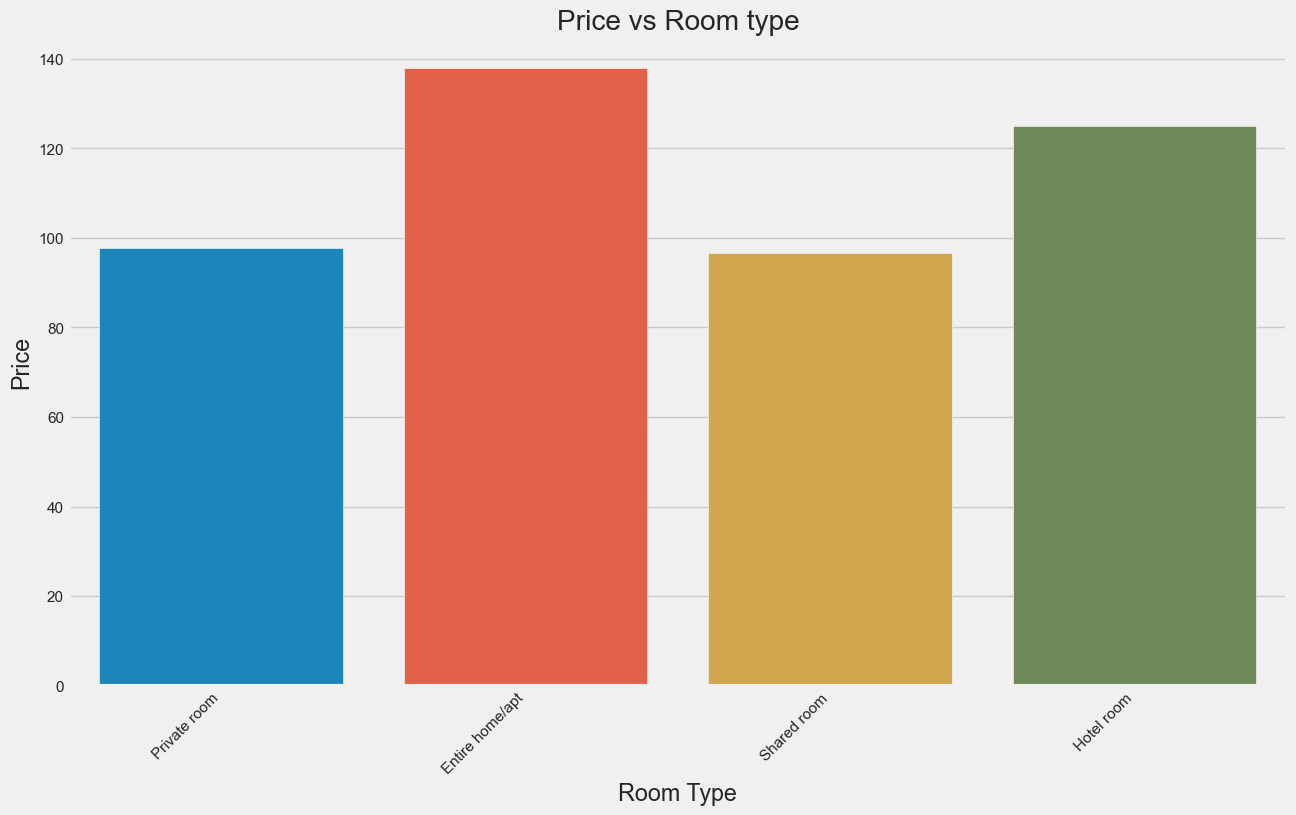

In [463]:
plt.figure(figsize=(14, 8))
sns.barplot(x='room_type', y='price', data=use_abn, ci=None)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.title('Price vs Room type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Availability 365

<Axes: xlabel='availability_365', ylabel='Count'>

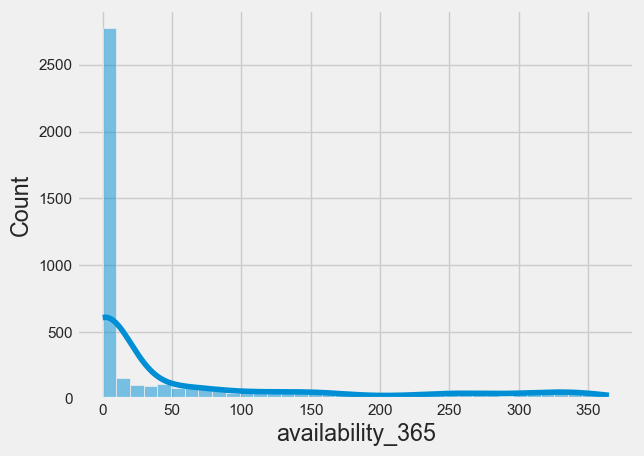

In [483]:
sns.histplot(x=use_abn['availability_365'],kde=True)

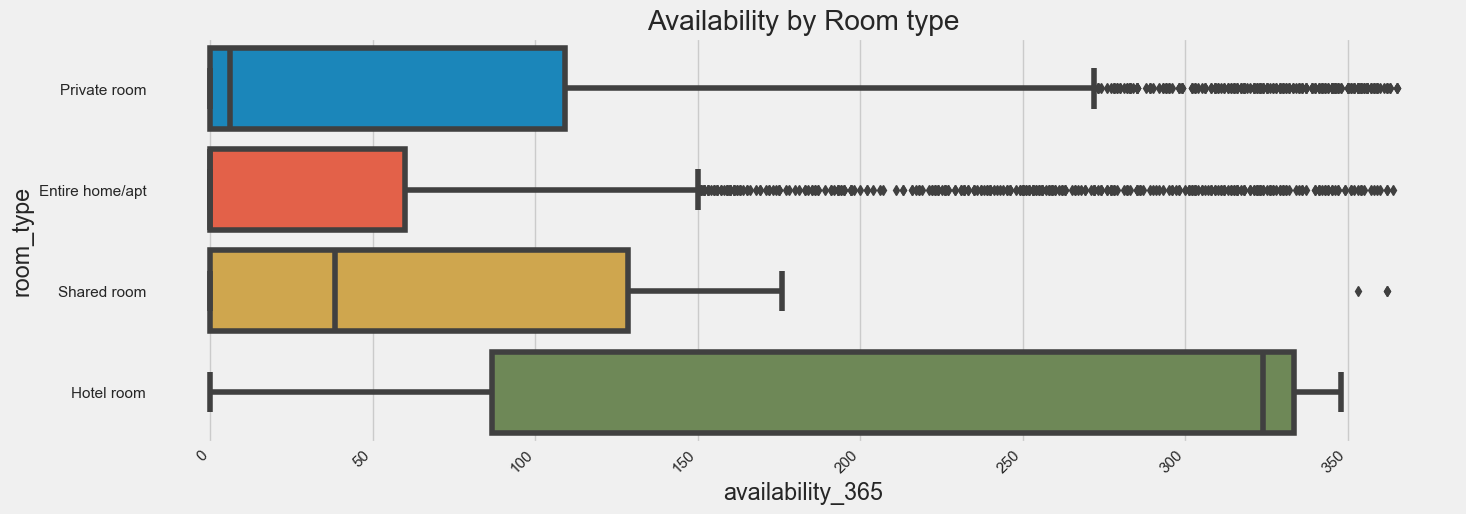

In [488]:
plt.figure(figsize=(15, 5))

sns.boxplot(x="availability_365", y="room_type", data=use_abn)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mayor legibilidad

plt.title('Availability by Room type')
plt.show()

While hotels offer a 360-day availability, it's important to note that the quantity of hotel options is significantly less compared to private rooms or shared rooms. Therefore, making a reservation through Airbnb remains a preferable choice for a wider range of room options.


# Localitation 


In [496]:
mapa = folium.Map(location=[use_abn['latitude'].mean(), use_abn['longitude'].mean()], zoom_start=5)
for index, row in use_abn.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(mapa)

# Save as HTML
mapa.save("mapa.html")

mapa